# Биномиальное распределение в Python
Библиотека `scipy`

In [1]:
from scipy.stats import binom
import numpy as np

from math import comb # биномиальные коэффициенты

import matplotlib.pyplot as plt

Пусть $X\sim Binom(n=10, p=0.7)$

Зададим распределение с заданными параметрами

In [2]:
rv = binom(n=10, p=0.7)

## Распределение вероятностей

Для вычисления вероятностей используем следующие методы

|Вероятность|Метод|
|-|-|
|$f(k)=P(X=k)$|`.pmf(k)`|
|$F(k)=P(X\leq k)$|`.cdf(k)`|
|$P(X>k)$|`.sf(k)=1-.cdf(k)`|
|$P(k_1<X\leq k_2)$|`.cdf(k2)-.cdf(k1)`|

Для для вычисления вероятности $P(k_1\leq X\leq k_2)$ можно использовать следующее наблюдение
$$
	P(k_1\leq X\leq k_2)=P(k_1-1< X\leq k_2)
$$


### Пример 1
Вычислим вероятность $P(X=4)=f(4)$



In [3]:
rv.pmf(k=4)

np.float64(0.036756909000000025)

Вычисли её непосредственно по формуле 

$$
	P(X=4)=f(4)=C_{10}^4\cdot 0.7^4\cdot(1-0.7)^{10-4}
$$

In [4]:
n, p, k = 10, 0.7, 4
comb(n, k)*(p**k)*((1-p)**(n-k))

0.03675690900000003

### Пример 2
Вычислим вероятности

$$
\begin{aligned}
	&P(X\leq 5) & &P(X>3) & &P(2<X\leq 6)
\end{aligned}
$$

In [5]:
rv.cdf(5), rv.sf(3), rv.cdf(6)-rv.cdf(2)

(np.float64(0.1502683326),
 np.float64(0.9894079216),
 np.float64(0.34879889519999996))

## Математическое ожидание, дисперсия, стандартное отклонение

Для вычисления используем следующие методы

|Величина|Метод|
|-|-|
|Математическое ожидание|`.mean()`|
|Дисперсия|`.var()`|
|Стандартное отклонение|`.std()`|

### Пример 3

Вычислим $E(X), Var(X), \sigma(X)$


In [6]:
rv.mean(), rv.var(), rv.std()

(np.float64(7.0),
 np.float64(2.1000000000000005),
 np.float64(1.449137674618944))

Можно вычислить непосредственно по формулам

$$
\begin{aligned}
	E(X)&=np \\ Var(X)&=np(1-p) \\ \sigma(X)&=\sqrt{Var(X)}
\end{aligned}
$$

In [7]:
n, p = 10, 0.7
n*p, n*p*(1-p), (n*p*(1-p))**0.5

(7.0, 2.1000000000000005, 1.449137674618944)

## Визуализация распределения вероятностей

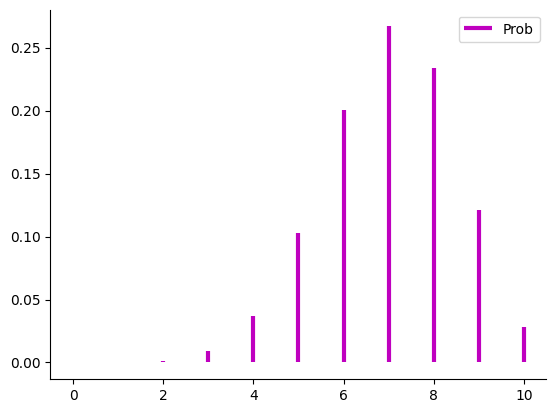

In [8]:
x = np.arange(start=0, stop=11, step=1)

fig, ax =  plt.subplots(1,1)

ax.vlines(x, 0, rv.pmf(x), linestyle='-', lw=3,  colors='m', label='Prob')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()